In [1]:
library(openxlsx)
library(enrichR)
library(rrvgo)
library(tidyr)
library(dplyr)
library(ggplot2)
set.seed(123)
setwd("/home/a.garg/integration_project/step_16/part_3")

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# we are taking nebula DE genes with logFC >0.25 in part1 and part2 script
files = system('ls /home/a.garg/integration_project/step_15/before_annotation/part_1/microglia*.xlsx',intern=T)
# read and save into excel
pages = lapply(files,function(f){
      name<- gsub(".*/ *", "\\1\\2",f)
})

tmp = lapply(pages,function(p){
 d = read.xlsx('/home/a.garg/integration_project/step_15/before_annotation/part_1/Microglia_nebula_ouput.xlsx',sheet=p)
 d = d[d$logFC_cluster > 0.25,]
#return(range(d$logFC_cluster))
return(dim(d))
})
tmp

[[1]]
[1] 126  11

[[2]]
[1] 632  11

[[3]]
[1] 1245   11

[[4]]
[1] 4677   11

[[5]]
[1] 2013   11

[[6]]
[1] 255  11

[[7]]
[1] 93 11

[[8]]
[1] 194  11

[[9]]
[1] 441  11

[[10]]
[1] 862  11

[[11]]
[1] 461  11

[[12]]
[1] 767  11

[[13]]
[1] 992  11

[[14]]
[1] 411  11

In [2]:
results = read.table('/home/a.garg/integration_project/step_16/part_1/EnricherConsensus_cellStates_upOnly.csv',sep=',')
padj  = read.table('/home/a.garg/integration_project/step_16/part_2/EnricherConsensus_cellStates_upOnly_padj.csv',sep=',')

#results <- results %>% select(contains("all"))
#padj <- padj %>% select(contains("all"))

# filter files
results = results[grep('GO:',rownames(results)),]
padj = padj[grep('GO:',rownames(padj)),]
results[is.na(results)] = 0
padj[is.na(padj)] = 1

In [24]:
head(padj)

,microglia0_all,microglia10_all,microglia11_all,microglia12_all,microglia13_all,microglia1_all,microglia2_all,microglia3_all,microglia4_all,microglia5_all,microglia6_all,microglia7_all,microglia8_all,microglia9_all
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
'de novo' posttranslational protein folding (GO:0051084),0,3.4382226,0.06356397,0.77370681,0.21030472,0.4835979,0,0,0.3016497,0.8308247,8.9569254,0.1532010,0.0000000,0.0000000
2-oxoglutarate metabolic process (GO:0006103),0,0.0000000,0.00000000,1.06908737,0.11145619,0.0000000,0,0,0.0000000,0.3368310,0.0000000,0.0000000,0.2928061,0.0000000
3'-phosphoadenosine 5'-phosphosulfate biosynthetic process (GO:0050428),0,0.0000000,0.49483347,0.09810701,0.00000000,0.0000000,0,0,0.0000000,0.6339288,0.0000000,0.6795245,0.5799163,0.0000000
3'-phosphoadenosine 5'-phosphosulfate metabolic process (GO:0050427),0,0.7297769,0.69571771,0.13746272,0.00000000,0.0000000,0,0,0.0000000,1.0415345,0.9491601,1.1604317,0.9038939,0.0000000
3'-UTR-mediated mRNA destabilization (GO:0061158),0,0.0000000,1.13416077,0.27153646,0.08780471,0.0000000,0,0,0.0000000,0.8248540,0.0000000,0.9074921,0.2541160,0.5485755
3'-UTR-mediated mRNA stabilization (GO:0070935),0,0.0000000,1.01012543,0.19621028,0.56952766,0.0000000,0,0,0.0000000,0.2614757,0.4648182,0.0000000,0.2219041,0.0000000


In [3]:
SetNames = unique(unlist(lapply(1:ncol(results),function(col){
 return(rownames(results[order(results[,col],decreasing=T),])[1:10])
})))

simM = calculateSimMatrix(sub('\\)','',sub(".*[\\(]","",SetNames)),orgdb="org.Hs.eg.db", ont="BP", method="Rel") 
score = unlist(apply(results[SetNames,],1,mean))

names(score) = sub('\\)','',sub(".*[\\(]","",SetNames))
reducedTerms = reduceSimMatrix(simM, score, threshold=0.6,orgdb="org.Hs.eg.db") 
GOs = unique(reducedTerms[,'parent'])
terms = unique(reducedTerms[,'parentTerm'])
#re-rank and order the terms now that some have been summarized out
rankR2 = apply(results[paste(terms,'('),],2,scale)

rownames(rankR2) = rownames(results[paste(terms,'('),])
rsum2 = rowMeans(rankR2)
rsum2 = rsum2[order(rsum2,decreasing=T)]
SetNames = names(rsum2)#[1:25] #manually did extra pruning from this list to get the list below (manualFilter)

filt = results[SetNames,] %>% na.omit()
filt_padj = padj[SetNames,] %>% na.omit()
data_wide = data.frame(row= rownames(filt),filt)
padj_wid = data.frame(row=rownames(filt_padj),filt_padj)
dm = data.matrix(filt)
colnames(dm) <- gsub("microglia|_all", "", colnames(dm))



preparing gene to GO mapping data...

preparing IC data...

'select()' returned 1:many mapping between keys and columns



In [4]:
colnames(dm) <- c("Homeostatic", "Unknown2", "IL1B","Cycling","Lipid Processing", 
"IFN-III","Neuronal Surveillance","MHCII","Mic-reduced","IFN-II",
"Stress","IFN-I","Activated","Unknown1")

In [5]:
dm %>% dim

[1] 37 14

In [6]:
#remove unknown cell clusters 
dm <- subset(dm, select = -c(Unknown1, Unknown2))

In [7]:
mydata_long <- data_wide %>%	gather("col", "val", -row)
padj_long = padj_wid %>% gather('col','padj',-row)
mydata_long$padj = padj_long$padj
#mydata_long = mydata_long[mydata_long$row %in% manualFilter,]
mydata_long <- mydata_long %>% mutate(col_new = gsub("microglia|_all", "", col)) 
mydata_long$col <- mydata_long$col_new

In [8]:
mydata_long$col_new  <- ifelse(mydata_long$col_new==0,"Homeostatic",
                          ifelse(mydata_long$col_new ==1,"IFN-III",
                                 ifelse(mydata_long$col_new ==2,"Neuronal Surveillance",
                                        ifelse(mydata_long$col_new ==3,"MHCII",
                                               ifelse(mydata_long$col_new==4,"Mic-reduced",
                                                      ifelse(mydata_long$col_new ==5,"IFN-II",
                                                             ifelse(mydata_long$col_new ==6,"Stress",
                                                             ifelse(mydata_long$col_new ==7,"IFN-I",
                                                             ifelse(mydata_long$col_new ==8,"Activated",
                                                             ifelse(mydata_long$col_new ==9,"Unknown1",
                                                             ifelse(mydata_long$col_new ==10,"Unknown2",
                                                             ifelse(mydata_long$col_new ==11,"IL1B",
                                                             ifelse(mydata_long$col_new ==12,"Cycling","Lipid Processing")))))))))))))

In [9]:
#remove unknown cell clusters 
mydata_long <- subset(mydata_long, !(col_new %in% c("Unknown1", "Unknown2")))

In [10]:
table(mydata_long$col_new)


            Activated               Cycling           Homeostatic 
                   37                    37                    37 
                IFN-I                IFN-II               IFN-III 
                   37                    37                    37 
                 IL1B      Lipid Processing                 MHCII 
                   37                    37                    37 
          Mic-reduced Neuronal Surveillance                Stress 
                   37                    37                    37 

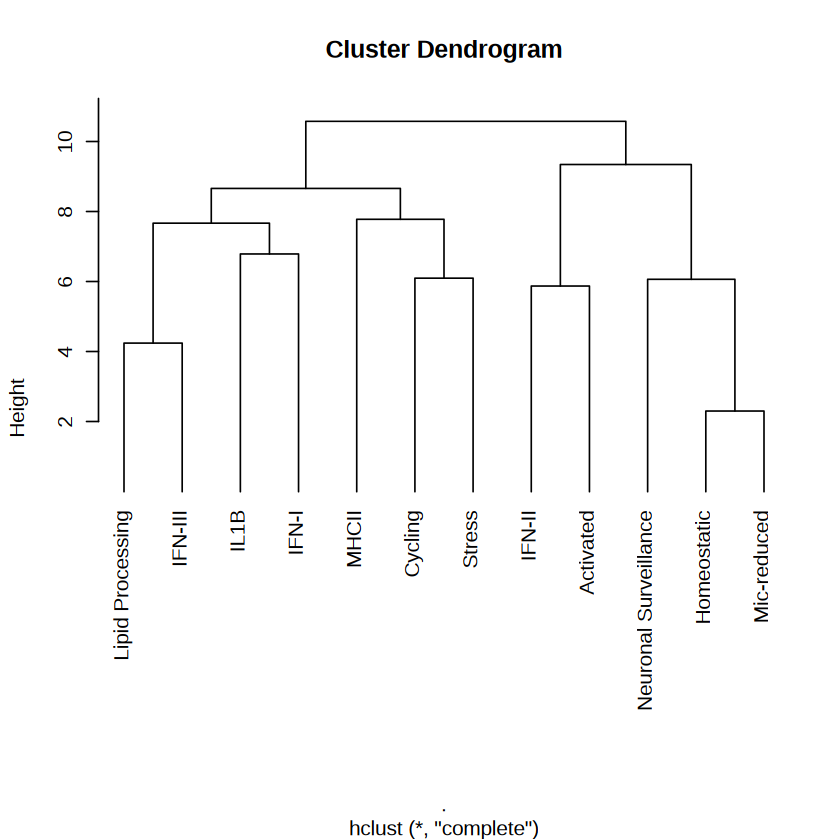

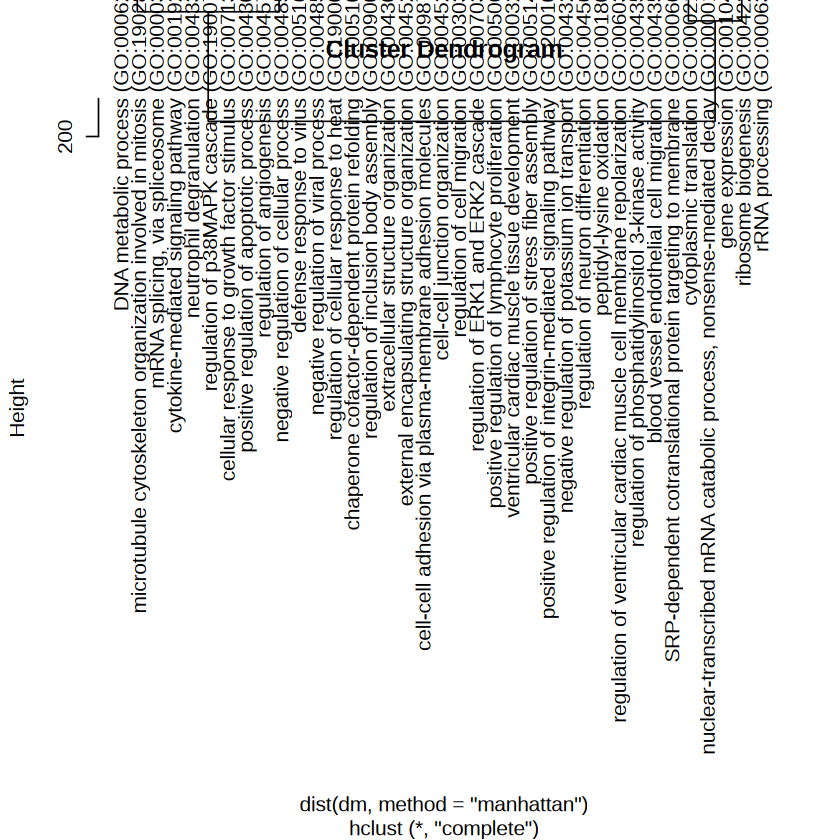

In [31]:
# Convert data in to a numeric matrix for clustering
colMeth = 'p'
rowMeth = 'euclidean'
  if(colMeth %in% c("euclidean","maximum","manhattan","canberra")){
   # Cluster columns using some distance calculation
   col_ord <- dm %>% t() %>%
     dist(method = colMeth) %>%  # look at ?dist for options '"euclidean"', '"maximum"', '"manhattan"', '"canberra",'"binary"'
     hclust()
   p1 = plot(col_ord, hang = -1)  # generate dendrogram
   col_ord <- col_ord$labels[col_ord$order]  # extract ordered col labels
  } else{
   # Alternative: cluster columns using correlation
   col_ord <- dm %>%
    # t() %>%  # correlation matrix transposes data, so we need to pre-transpose
     cor(method = "p") %>%  # Spearman correlation matrix
     dist(method = "canberra") %>%  # default euclidean distance
     hclust()
   hclust(dist(dm))
   p1 = plot(col_ord, hang = -1)  # generate dendrogram
   col_ord <- col_ord$labels[col_ord$order]  # extract ordered col labels
  }
  if(rowMeth %in% c("euclidean","maximum","manhattan","canberra")){
   ## Cluster rows
   row_ord <- hclust(dist(dm, method = "manhattan"))  # one-liner doing the same thing - note transposition to cluster by rows
   p2 = plot(row_ord, hang = -1)  # generate dendrogram
   row_ord <- row_ord$labels[row_ord$order]  # extract ordered row labels
  } else{
   # Alternative: cluster rows using correlation
   row_ord <- dm %>%  t() %>% cor(method = "s") %>%  dist(method = "canberra") %>%  hclust()
   hclust(dist(dm))
   p1 = plot(row_ord, hang = -1)  # generate dendrogram
   row_ord <- row_ord$labels[row_ord$order]  # extract ordered col labels
  }

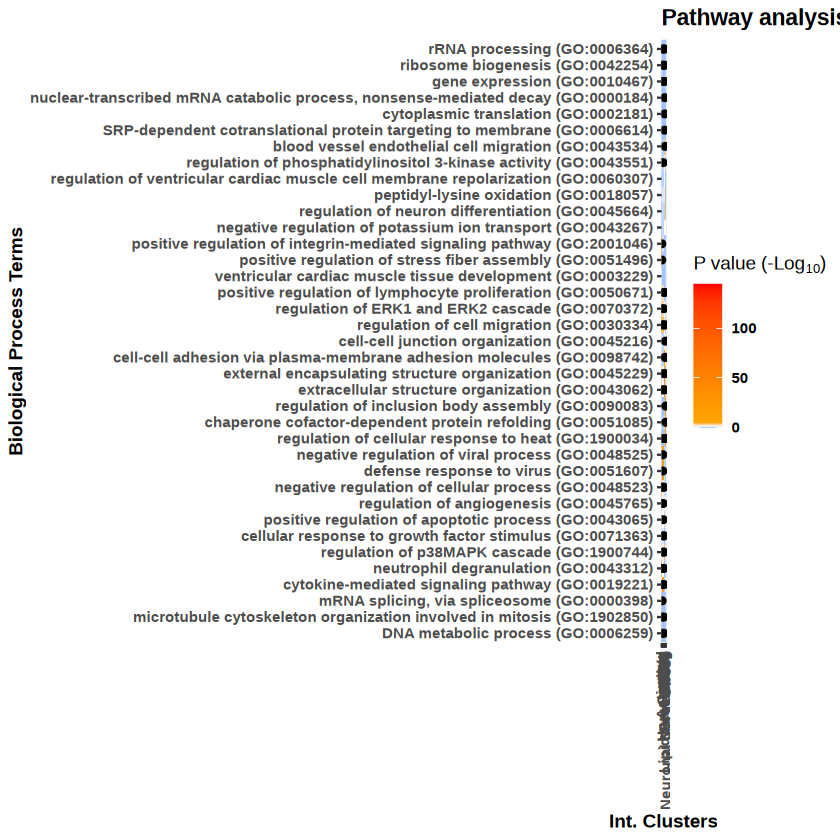

In [33]:
col_lim <- max(mydata_long$val)

p <-  mydata_long %>%
  
    mutate(col = factor(col, levels = col_ord)) %>%
    mutate(row = factor(row, levels = row_ord)) %>%
  
    ggplot(aes(x = col_new, y = row, fill = val)) +
    geom_tile() +
    # Optional: add black points on tiles with significant p-adj
    geom_point(data = filter(mydata_long, padj < 0.05)) +
   #geom_point(data = filter(mydata_long, val > -log10(0.05))) +
    # Color scale
    #scale_fill_distiller(palette = "RdBu", limits = c((-log10(0.05)*2-col_lim), col_lim)) +
   scale_fill_gradientn(colors=c('#A0C5FF','white','orange','red'), values=scales::rescale(c(0,-log10(0.05),5,col_lim)),guide='colorbar',limits=c(0,col_lim)) +
    # # Alternative color scale using log10-transformation, but showing actual values
    #scale_fill_distiller(
    #   palette = "RdBu", limits = c((-log10(0.05)*2-col_lim), col_lim),
    #   trans = "log10", labels = scales::comma
    # ) +
    labs(x = "Int. Clusters", y = "Biological Process Terms", fill = expression("P value (-Log"[10]*")"),
         title = "Pathway analysis") +
    theme(axis.text.x = element_text(angle = 90, vjust = .5, hjust = 1, face="bold"),
          panel.grid = element_blank())

 p <- p + theme(text = element_text(face = "bold")) 
  plot(p)
  #ggsave(p,file=sprintf('~/scratch/GO_KEGG_heatmap_cellStates_col_%s_row_%s.pdf',colMeth,rowMeth),h=17,w=15) #full fig
  
ggsave(p,file='filter_Pathway_heatmap.pdf',h=150,w=250,units='mm')
    

In [16]:
head(mydata_long)

,BP Terms,clust,Pval,Padj,Transcriptional State
,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,extracellular structure organization (GO:0043062),0,3.35346144,0.09414668,Homeostatic
2,external encapsulating structure organization (GO:0045229),0,3.34146543,0.09414668,Homeostatic
3,regulation of cell migration (GO:0030334),0,1.35102878,0.32821281,Homeostatic
4,cytokine-mediated signaling pathway (GO:0019221),0,0.04285452,0.91787966,Homeostatic
5,cell-cell adhesion via plasma-membrane adhesion molecules (GO:0098742),0,1.03409896,0.33219540,Homeostatic
6,neutrophil degranulation (GO:0043312),0,0.02049509,0.95749207,Homeostatic


In [15]:
colnames(mydata_long) <- c("BP Terms","clust","Pval","Padj","Transcriptional State")
write.csv(mydata_long,"Final_BP_pathway.csv")